# Inventory and Shrink

#### This is a sample on how to clean /format data to troubleshoot inventory and shrink processes and how to identify key issues. 
#### All the data has been taken from a mix of online sources, adapted and changed to demonstrate these steps, and does not currently represent any companies actual inventory data. 

In [3]:
#Import libraries
import pandas as pd
import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pprint import pprint as pp

%matplotlib inline

In [4]:
#Update variable with the file name
transactions_file = '/Users/knico/new-git-project/Inventory_Data.csv'
customer_file = '/Users/knico/new-git-project/Customers.csv'
shrink_report = '/Users/knico/new-git-project/shrink.csv'


In [5]:
# Convert to pandas dataframe and print a few lines.
df = pd.read_csv(transactions_file)
print(df.head())

    Order Sale_Date      Type  Store_ID  Transaction_ID  SKU  Delivery  Sales  \
0  133429  2/2/2021  Delivery      1666             866  1TS       230    0.0   
1  132970  2/3/2021  Delivery      4736             624  R6E       372    0.0   
2  132685  2/4/2021  Delivery      6459             482  IEV       298    0.0   
3  133327  2/5/2021  Delivery      3719             810  C8Z       466    0.0   
4  133115  2/6/2021  Delivery      1253             708  8HU       360    0.0   

   Sales_Amount  Inventory   Shrink  
0         37.38        156  37.3695  
1          2.06        253   1.1214  
2          4.96         82 -11.4080  
3          8.88        453   8.8695  
4          2.76          8   0.2664  


In [6]:
# Convert the customers file to a dataframe
cust = pd.read_csv(customer_file)
print(cust.head())


   Customer Number  Store number    Type  PBS  Group    DM   BU State Division
0                1          1253  Retail  Yes     11  DM_1  412    NJ    North
1                2          1666  Retail  Yes     11  DM_1  422    NY    North
2                3          2065  Retail  Yes     11  DM_1  422    TX    South
3                4          2116  Retail  Yes     11  DM_1  412    CA    South
4                5          2547  Retail  Yes     11  DM_1  433    PA     East


In [7]:
#Rename columns
# This is a placeholder in case any columns need to be renamed.
cust = cust.rename(columns = {'Customer Number' : 'Account_Number', 'Store number': 'Store_ID'})
print(cust)

    Account_Number  Store_ID            Type  PBS  Group    DM   BU State  \
0                1      1253          Retail  Yes     11  DM_1  412    NJ   
1                2      1666          Retail  Yes     11  DM_1  422    NY   
2                3      2065          Retail  Yes     11  DM_1  422    TX   
3                4      2116          Retail  Yes     11  DM_1  412    CA   
4                5      2547          Retail  Yes     11  DM_1  433    PA   
5                6      3071          Retail  Yes     11  DM_2  457    OH   
6                7      3624          Retail  Yes     11  DM_2  457    VA   
7                8      3686          Retail  Yes     10  DM_2  412    NJ   
8                9      3719          Retail  Yes     10  DM_3  422    NY   
9               10      3874       Warehouse  Yes     11  DM_4  422    TX   
10              11      4736       Warehouse  Yes     11  DM_1  412    CA   
11              12      4776       Warehouse  Yes     11  DM_1  433    PA   

# Section 1 Clean Up

## A: Error Reports
#### Check the error reports and clean up any errors, close any pending transactions and ensure everything is correct before proceeding. Missing deliveries could cause negative shrink, while missing sales would increase shrink.

## B: RAIL (Rolling Action Item List)
### Add above and any other items that come up in the analysis to the RAIL.

# Section 2 History and Baselines

## A: History
#### Screen shots the previous period and current period for comparison. 

## B: Baselines for the Period
#### Box plots for the period to see the stats. 

In [8]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133635 entries, 0 to 133634
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order           133635 non-null  int64  
 1   Sale_Date       133635 non-null  object 
 2   Type            133635 non-null  object 
 3   Store_ID        133635 non-null  int64  
 4   Transaction_ID  133635 non-null  int64  
 5   SKU             133635 non-null  object 
 6   Delivery        133635 non-null  int64  
 7   Sales           133635 non-null  float64
 8   Sales_Amount    133635 non-null  float64
 9   Inventory       133635 non-null  int64  
 10  Shrink          133635 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 11.2+ MB


In [9]:
def drop_columns(drop_list, data_frame):
    """Function will drop any unwanted columns"""
    for col_name in drop_list:
        if col_name in data_frame:
            data_frame.drop(labels=col_name,axis=1 , inplace = True)
            print("Column", col_name, " has been deleted")
        else: 
            print(col_name ,"does not exist")
    

In [10]:
# Define list of columns to drop and call the function.
drop_list = ['Order','Transaction_ID']
drop_columns(drop_list, df)

Column Order  has been deleted
Column Transaction_ID  has been deleted


In [11]:

def change_var_type(col_as_string, ctype):
    """This function will convert data types"""
    if ctype == 'string':
        #new_type = df[col_as_string].astype("|S")
        new_type = df[col_as_string].astype("string")
    if ctype == 'number':
        new_type = df[col_as_string].astype(int)
    if ctype == 'date':
       new_type = pd.to_datetime(df[col_as_string])
     
    return new_type

In [12]:
# Call the function to convert the data types. Convert to datetime.
df['Store_ID'] = change_var_type('Store_ID','string')

df['Sale_Date'] = change_var_type('Sale_Date', 'date')

In [13]:
df.describe(include='all')

C:\Users\knico\AppData\Local\Temp/ipykernel_19716/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Sale_Date,Type,Store_ID,SKU,Delivery,Sales,Sales_Amount,Inventory,Shrink
count,133635,133635,133635,133635,133635.000000,133635.000000,133635.000000,133635.000000,133635.000000
unique,365,2,30,187,NaN,NaN,NaN,NaN,NaN
top,2021-07-28 00:00:00,Sale,1253,N8U,NaN,NaN,NaN,NaN,NaN
freq,415,131706,13636,11088,NaN,NaN,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.714349,1.463871,11.947653,2.796805,-4.968134
std,NaN,NaN,NaN,NaN,49.294191,3.848695,19.306320,28.038712,31.972832
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.020000,0.000000,-1162.857000
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,4.230000,0.000000,-9.729000


In [14]:
#Add up the Sales by Location

period_pivot = df.groupby(['Store_ID']).sum()['Sales_Amount']
print(period_pivot)

Store_ID
1253    162224.19
1666     65985.15
2065     32484.37
2116     61614.45
2547     32720.51
3071     66979.57
3624     32470.94
3686     31406.65
3719     32253.04
3874     63209.39
4736     99475.75
4776     33977.25
4921     31312.84
5010     34017.36
5058     31949.58
5541     63695.54
5599     65516.98
5780     32727.94
592      65745.46
6044     65677.75
6294     98304.06
6450     32469.71
6459     65061.79
6865     31828.48
7548     65768.94
822      34053.33
8303     33195.44
8566     31618.03
9200     34124.90
9223     64755.21
Name: Sales_Amount, dtype: float64


In [15]:
# Pivot table of the total amounts
period_pivot=pd.pivot_table(df, index=['Store_ID'],values=['Delivery','Sales','Inventory','Shrink','Sales_Amount'],aggfunc=np.sum)
print(period_pivot)

          Delivery  Inventory      Sales  Sales_Amount      Shrink
Store_ID                                                          
1253         76861      37665  18922.280     162224.19 -64197.0563
1666         31625      16088   7974.630      65985.15 -26757.1809
2065         14783       7907   4007.500      32484.37 -15815.2563
2116         30509      15671   8092.920      61614.45 -25134.2250
2547         16766       7674   4025.160      32720.51 -14310.5020
3071         29068      15195   7984.580      66979.57 -27353.2227
3624         16100       8836   3829.720      32470.94 -14117.9682
3686         16186       8606   4180.160      31406.65 -10053.1767
3719         15399       7692   4278.760      32253.04 -12747.8651
3874         31844      15648   8407.890      63209.39 -26689.6147
4736         46947      21928  12554.240      99475.75 -44223.0490
4776         16701       8429   4156.800      33977.25 -13718.7583
4921         16312       7768   4152.750      31312.84 -16853.

In [16]:
period_pivot.describe()

,Delivery,Inventory,Sales,Sales_Amount,Shrink
count,30.000000,30.000000,30.00000,30.000000,30.000000
mean,25454.566667,12458.366667,6520.81430,53220.820000,-22130.553527
std,13602.431590,6601.952859,3436.90914,28980.167005,11845.666594
min,14108.000000,6807.000000,3711.83000,31312.840000,-64197.056300
25%,16121.500000,7711.000000,3992.50000,32474.297500,-27320.680100
50%,17084.000000,9232.500000,4352.49000,34089.115000,-16334.390050
75%,31038.250000,15534.750000,7991.09525,65637.557500,-13702.162600
max,76861.000000,37665.000000,18922.28000,162224.190000,-10053.176700


whiskers: [array([16121.5, 14108. ]), array([31038.25, 46947.  ]), array([7711., 6807.]), array([15534.75, 23200.  ]), array([3992.5 , 3711.83]), array([ 7991.09525, 12554.24   ]), array([32474.2975, 31312.84  ]), array([65637.5575, 99475.75  ]), array([-27320.6801, -44223.049 ]), array([-13702.1626, -10053.1767])]

caps: [array([14108., 14108.]), array([46947., 46947.]), array([6807., 6807.]), array([23200., 23200.]), array([3711.83, 3711.83]), array([12554.24, 12554.24]), array([31312.84, 31312.84]), array([99475.75, 99475.75]), array([-44223.049, -44223.049]), array([-10053.1767, -10053.1767])]

boxes: [array([16121.5 , 16121.5 , 31038.25, 31038.25, 16121.5 ]), array([ 7711.  ,  7711.  , 15534.75, 15534.75,  7711.  ]), array([3992.5    , 3992.5    , 7991.09525, 7991.09525, 3992.5    ]), array([32474.2975, 32474.2975, 65637.5575, 65637.5575, 32474.2975]), array([-27320.6801, -27320.6801, -13702.1626, -13702.1626, -27320.6801])]

medians: [array([17084., 17084.]), array([9232.5, 9232.

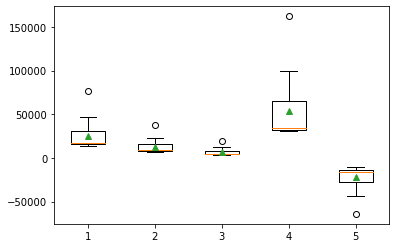

In [17]:
sales_bp = plt.boxplot(period_pivot, showmeans= True)
for key in sales_bp:
    print(f'{key}: {[item.get_ydata() for item in sales_bp[key]]}\n')

In [18]:
# Define the variables for outliers
# Deliveries cap
Delivery_capA = 14108
Delivery_capB = 46947

# Inventory Cap
Inv_capA  = 6807
Inv_capB = 23200

# Sales Cap
Sales_capA = 3248
Sales_capB = 12144


In [19]:
#Print the outliers:
for store in period_pivot:
    print(store)

Delivery
Inventory
Sales
Sales_Amount
Shrink


In [20]:
#High Outliers
D_outliers = period_pivot[period_pivot['Delivery'] > Delivery_capB].copy() 
S_outliers = (period_pivot[period_pivot['Sales'] > Sales_capB].copy())
I_outliers = (period_pivot[period_pivot['Inventory'] > Inv_capB].copy())

In [21]:
print("Delivery Outliers: ",D_outliers)


Delivery Outliers:            Delivery  Inventory     Sales  Sales_Amount      Shrink
Store_ID                                                         
1253         76861      37665  18922.28     162224.19 -64197.0563


In [22]:
print(S_outliers)

          Delivery  Inventory     Sales  Sales_Amount      Shrink
Store_ID                                                         
1253         76861      37665  18922.28     162224.19 -64197.0563
4736         46947      21928  12554.24      99475.75 -44223.0490


In [23]:
print(I_outliers)

          Delivery  Inventory     Sales  Sales_Amount      Shrink
Store_ID                                                         
1253         76861      37665  18922.28     162224.19 -64197.0563


In [24]:
# Low Outliers in deliveries
low_D = period_pivot[period_pivot['Delivery'] < Delivery_capA].copy() 
print(low_D)

Empty DataFrame
Columns: [Delivery, Inventory, Sales, Sales_Amount, Shrink]
Index: []


In [25]:
#Low outliers in sales
low_S = period_pivot[period_pivot['Sales'] < Sales_capA].copy()
print(low_S)

Empty DataFrame
Columns: [Delivery, Inventory, Sales, Sales_Amount, Shrink]
Index: []


In [26]:
#Low outliers in Inventory
low_I = period_pivot[period_pivot['Inventory'] < Inv_capA].copy()
print(low_I)

Empty DataFrame
Columns: [Delivery, Inventory, Sales, Sales_Amount, Shrink]
Index: []


## C: Box Plots by Occurance
#### Find stats and make box plots by the occurance.

In [27]:
#split the data frame into Deliveries & Inventory, and Sales.
D_Occurence = df[df['Type'] == 'Delivery' ].copy()
S_Occurence = df[df['Type'] == 'Sale'].copy()

In [28]:
#Stats on the deliveries and inventory
D_Occurence.describe(include = 'all')

C:\Users\knico\AppData\Local\Temp/ipykernel_19716/2695871421.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  D_Occurence.describe(include = 'all')


,Sale_Date,Type,Store_ID,SKU,Delivery,Sales,Sales_Amount,Inventory,Shrink
count,1929,1929,1929,1929,1929.000000,1929.0,1929.000000,1929.000000,1929.000000
unique,363,1,30,126,NaN,NaN,NaN,NaN,NaN
top,2021-01-14 00:00:00,Delivery,1253,N8U,NaN,NaN,NaN,NaN,NaN
freq,14,1929,196,175,NaN,NaN,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,395.871954,0.0,9.635034,193.753758,-3.876518
std,NaN,NaN,NaN,NaN,117.857748,0.0,15.050076,132.186771,24.648017
min,NaN,NaN,NaN,NaN,5.000000,0.0,0.150000,0.000000,-566.881000
25%,NaN,NaN,NaN,NaN,296.000000,0.0,4.110000,88.000000,-9.338000


In [29]:
# Stats on the Sales
S_Occurence.describe(include= 'all')

C:\Users\knico\AppData\Local\Temp/ipykernel_19716/1593806960.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  S_Occurence.describe(include= 'all')


,Sale_Date,Type,Store_ID,SKU,Delivery,Sales,Sales_Amount,Inventory,Shrink
count,131706,131706,131706,131706,131706.0,131706.000000,131706.000000,131706.0,131706.000000
unique,365,1,30,187,NaN,NaN,NaN,NaN,NaN
top,2021-07-28 00:00:00,Sale,1253,N8U,NaN,NaN,NaN,NaN,NaN
freq,409,131706,13440,10913,NaN,NaN,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.0,1.485311,11.981524,0.0,-4.984122
std,NaN,NaN,NaN,NaN,0.0,3.872667,19.359699,0.0,32.067480
min,NaN,NaN,NaN,NaN,0.0,0.010000,0.020000,0.0,-1162.857000
25%,NaN,NaN,NaN,NaN,0.0,1.000000,4.230000,0.0,-9.729000


In [30]:
# Drop the columns not used in the box plot for deliveries and inventory.
D_boxplot = D_Occurence
drop_list = ['Sale_Date','Type','Store_ID','Sales_Amount','Sales','SKU']
drop_columns(drop_list, D_boxplot)


Column Sale_Date  has been deleted
Column Type  has been deleted
Column Store_ID  has been deleted
Column Sales_Amount  has been deleted
Column Sales  has been deleted
Column SKU  has been deleted


In [31]:
#Drop the columns for the sales that won't be used in the box plot.
S_boxplot = S_Occurence
drop_list = ['Sale_Date', 'Type', 'Store_ID', 'Sales_Amount','Inventory', 'Delivery','SKU']
drop_columns(drop_list, S_boxplot)

Column Sale_Date  has been deleted
Column Type  has been deleted
Column Store_ID  has been deleted
Column Sales_Amount  has been deleted
Column Inventory  has been deleted
Column Delivery  has been deleted
Column SKU  has been deleted


whiskers: [array([296.,   5.]), array([497., 600.]), array([88.,  0.]), array([282., 571.]), array([ -9.338, -29.601]), array([ 4.1795, 22.4495])]

caps: [array([5., 5.]), array([600., 600.]), array([0., 0.]), array([571., 571.]), array([-29.601, -29.601]), array([22.4495, 22.4495])]

boxes: [array([296., 296., 497., 497., 296.]), array([ 88.,  88., 282., 282.,  88.]), array([-9.338 , -9.338 ,  4.1795,  4.1795, -9.338 ])]

medians: [array([391., 391.]), array([177., 177.]), array([0.1836, 0.1836])]

fliers: [array([1000.]), array([947., 589., 575.]), array([ -69.069 ,  -30.912 ,  -51.474 ,  -42.941 ,  -46.851 ,  -50.807 ,
        -69.069 ,  -31.234 , -149.431 ,  -48.921 ,  -58.098 ,  -79.051 ,
        -36.524 ,  -78.338 ,  -31.878 ,  -40.342 ,  -57.868 ,  -40.25  ,
        -37.076 ,  -33.189 , -146.142 ,  -45.264 , -126.707 ,  -33.672 ,
        -69.    ,  -37.26  ,  -44.712 ,  -48.369 ,  -57.339 , -204.447 ,
        -30.13  ,  -51.175 ,  -42.136 ,  -67.413 ,  -77.073 ,  -31.303 ,
     

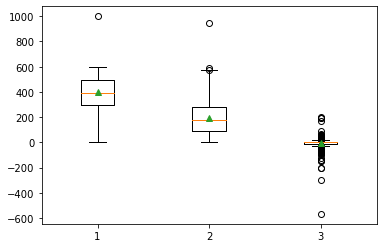

In [32]:
#Box plot of deliveries and inventory.
D_boxplot = plt.boxplot(D_boxplot, showmeans= True)
for key in D_boxplot:
    print(f'{key}: {[item.get_ydata() for item in D_boxplot[key]]}\n')

whiskers: [array([1., 1.]), array([1., 1.]), array([ -9.729, -30.705]), array([ 4.2795, 25.2895])]

caps: [array([1., 1.]), array([1., 1.]), array([-30.705, -30.705]), array([25.2895, 25.2895])]

boxes: [array([1., 1., 1., 1., 1.]), array([-9.729 , -9.729 ,  4.2795,  4.2795, -9.729 ])]

medians: [array([1., 1.]), array([0.2076, 0.2076])]

fliers: [array([0.3 , 0.66, 0.67, ..., 2.  , 3.  , 2.  ]), array([ -43.332 , -530.909 ,  -34.845 , ...,  707.7195,   43.5695,
         32.2995])]

means: [array([1.48531144]), array([-4.98412224])]



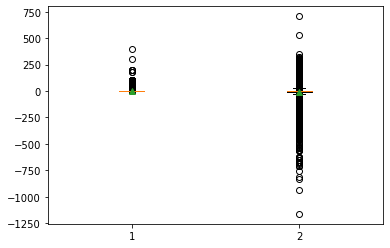

In [33]:
#Box plot for sales
S_boxplot = plt.boxplot(S_boxplot, showmeans= True)
for key in S_boxplot:
    print(f'{key}: {[item.get_ydata() for item in S_boxplot[key]]}\n')

In [34]:
## Update Caps to find outliers
# Delivery Caps
d_cap1 = 10
d_cap2 = 600
# Inventory caps
i_cap1 = 0
i_cap2 = 571
# Sales caps
s_cap1 = 0
s_cap2 = 350

In [35]:
#Print the outliers in deliveries.
for outlier in df.index:
    if df.loc[outlier, "Type"] == 'Delivery':
        if df.loc[outlier, "Delivery"] < d_cap1 or df.loc[outlier, "Delivery"] > d_cap2:
            print(df.loc[[outlier]])
  
         
  

     Sale_Date      Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
101 2021-12-10  Delivery     2547  X52      1000    0.0          3.13   

     Inventory  Shrink  
101        947  -7.199  
      Sale_Date      Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
1160 2021-05-23  Delivery     1253  LSD         5    0.0          8.37   

      Inventory  Shrink  
1160          1 -19.251  


In [36]:
#Print the outliers in Inventory
for outlier in df.index:
    if df.loc[outlier, "Type"] == 'Delivery':
        if df.loc[outlier, "Inventory"] < i_cap1 or df.loc[outlier, "Inventory"] > i_cap2:
            print(df.loc[[outlier]])

     Sale_Date      Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
101 2021-12-10  Delivery     2547  X52      1000    0.0          3.13   

     Inventory  Shrink  
101        947  -7.199  
      Sale_Date      Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
1161 2021-05-23  Delivery     8303  Q4N       599    0.0          8.37   

      Inventory  Shrink  
1161        589  8.3595  
      Sale_Date      Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
1838 2021-01-14  Delivery     6294  JPI       588    0.0          1.84   

      Inventory  Shrink  
1838        575  -4.232  


In [37]:
#Print the outliers in Sales.
for outlier in df.index:
    if df.loc[outlier, "Type"] == "Sale":
        if df.loc[outlier, "Sales"] < s_cap1 or df.loc[outlier, "Sales"] > s_cap2:
            print(df.loc[[outlier]])

       Sale_Date  Type Store_ID  SKU  Delivery  Sales  Sales_Amount  \
83212 2021-05-20  Sale     7548  H8O         0  400.0         16.37   

       Inventory  Shrink  
83212          0  0.1155  


# Section 3 - Customer Analysis

### A: Active Customers
#### Count the number of active customers in the group. 

In [38]:
# Total Records
n_records = len(cust)
print(n_records)

30


In [39]:
#Count the number of customers by PBS type.
print(cust.groupby(['PBS']).count()['Store_ID'])

PBS
No     15
Yes    13
Name: Store_ID, dtype: int64


### B: Percentages by Type
#### Take the percentages of each type for all active customers. 

In [40]:
# Calculate the percentages by type only on the PBS
cust_type = cust[cust['PBS'] =='Yes'].copy()
cust_type = (cust_type.groupby(['Type']).count()['Store_ID'] )/ len(cust)
print(round(cust_type * 100), '%')

Type
Retail       30.0
Warehouse    13.0
Name: Store_ID, dtype: float64 %


In [41]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Account_Number  30 non-null     int64 
 1   Store_ID        30 non-null     int64 
 2   Type            30 non-null     object
 3   PBS             28 non-null     object
 4   Group           30 non-null     int64 
 5   DM              30 non-null     object
 6   BU              30 non-null     int64 
 7   State           30 non-null     object
 8   Division        30 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.2+ KB


### C: Products 
#### Breakdown what was sold vs delivered.

In [42]:

products =pd.pivot_table(df, index=['SKU'],values=['Delivery','Sales','Shrink'],aggfunc=np.sum)
print(products)

     Delivery    Sales      Shrink
SKU                               
01F      9578  3904.00 -17830.3917
06Z       373   216.67    290.7690
0H2     45806  4639.00 -13369.7275
0KX      2300   483.00   -781.3613
0WT      2968   715.00  -1558.0047
..        ...      ...         ...
Z4O      6531   786.00  -2021.8923
Z99       302    58.00   -514.5036
ZJG         0    15.60   -174.8705
ZX5         0   147.00   -414.6861
ZYU         0   147.00  -1036.7341

[187 rows x 3 columns]


### D: Group Type
#### Count the items by the type.

In [43]:

group_type = cust[cust['PBS'] =='Yes'].copy()
group_type = (group_type.groupby(['Group']).count()['Store_ID'] ) 
print(group_type)

Group
10     2
11    11
Name: Store_ID, dtype: int64


### E: Shrink
#### Log total shrink percentage and dollar amount on the template. 

# Section 4: Major Issues

## A: Deliveries No Sales
#### Find any locations that have deliveries but no sales

In [44]:
#Print records from stores with 0 deliveries
print(period_pivot.loc[period_pivot['Delivery'] == 0])


Empty DataFrame
Columns: [Delivery, Inventory, Sales, Sales_Amount, Shrink]
Index: []


## B: Sales no Deliveries
#### Find any locations that have scans but no deliveries.

In [45]:
#Print records from stores with 0 sales
print(period_pivot.loc[period_pivot['Sales']== 0])

Empty DataFrame
Columns: [Delivery, Inventory, Sales, Sales_Amount, Shrink]
Index: []


## C: Shrink Greater than Sales
#### Find any locations that have shrink greater than the sales. 

In [46]:
cust['Store_ID'] = change_var_type('Store_ID','string')

In [47]:
full_file = pd.merge(period_pivot, cust, on = 'Store_ID', how = 'outer')

In [48]:
print(full_file)

   Store_ID  Delivery  Inventory      Sales  Sales_Amount      Shrink  \
0      1253     76861      37665  18922.280     162224.19 -64197.0563   
1      1666     31625      16088   7974.630      65985.15 -26757.1809   
2      2065     14783       7907   4007.500      32484.37 -15815.2563   
3      2065     14783       7907   4007.500      32484.37 -15815.2563   
4      2116     30509      15671   8092.920      61614.45 -25134.2250   
5      2547     16766       7674   4025.160      32720.51 -14310.5020   
6      3071     29068      15195   7984.580      66979.57 -27353.2227   
7      3624     16100       8836   3829.720      32470.94 -14117.9682   
8      3686     16186       8606   4180.160      31406.65 -10053.1767   
9      3719     15399       7692   4278.760      32253.04 -12747.8651   
10     3874     31844      15648   8407.890      63209.39 -26689.6147   
11     3874     31844      15648   8407.890      63209.39 -26689.6147   
12     4736     46947      21928  12554.240      99

In [49]:
#Shrink Greater than Sales
high_shrink = []
for shrink in full_file.index:
        if full_file.loc[shrink, "Shrink"] > full_file.loc[shrink, "Sales_Amount"]:
            print(full_file.loc[[shrink]])
         

# Section 5 Days of Sales

## A: Sales Per Day
#### Determine the total amount of sales per day (and graph) for all customers. Find general stats. 

In [50]:
# View the sales and deliveries by date
scan_volume=pd.pivot_table(df, index=['Sale_Date'],values=['Sales'],aggfunc=np.sum)
print(scan_volume)

             Sales
Sale_Date         
2021-01-01  580.00
2021-01-02  505.67
2021-01-03  472.83
2021-01-04  474.00
2021-01-05  607.00
...            ...
2021-12-27  588.33
2021-12-28  501.00
2021-12-29  437.80
2021-12-30  526.00
2021-12-31  468.00

[365 rows x 1 columns]


## B: Line Graph
#### Show a line graph for scans for all customers. 

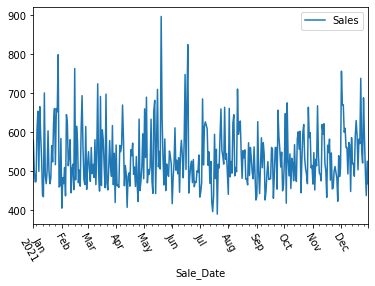

In [51]:
scan_volume.plot()
plt.xticks(rotation=300)
plt.show()


In [52]:
scan_volume.describe()

,Sales
count,365.00000
mean,535.95734
std,77.46863
min,390.33000
25%,480.92000
50%,518.50000
75%,581.00000
max,897.00000


In [53]:
#Max Sale Day & Min Sale Day
print(scan_volume[scan_volume.Sales == scan_volume.Sales.max()])
print(scan_volume[scan_volume.Sales == scan_volume.Sales.min()])

            Sales
Sale_Date        
2021-05-20  897.0
             Sales
Sale_Date         
2021-07-20  390.33


In [54]:
#Convert to date format
scan_volume['Sale_Date'] = change_var_type('Sale_Date', 'date')

In [55]:
# Check for any missing dates for the chain customer as a whole.
Start_Date = '2021-05-20'
End_Date = '2022-05-20'
DOS = scan_volume.set_index('Sale_Date')
DOS.index = pd.to_datetime(DOS.index)
print("No Sales on These dates")
k = pd.date_range(start=Start_Date, end = End_Date).difference(DOS.index);
print(k)

No Sales on These dates
DatetimeIndex(['2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29',
               ...
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', length=366, freq=None)


In [56]:
# Function to print graphs on any high risk locations
def customer_df(df, customer_number):
    
    customer_df = df[df['Store_ID'] == customer_number]
    
    customer_df = customer_df[customer_df['Type']== 'Sale']
    
    customer_df = customer_df.groupby(['Sale_Date']).sum()['Sales']
    
    customer_df.plot()
    plt.title(customer_number, fontsize = 14) 
    plt.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = (7,3.5)
    plt.show()
    

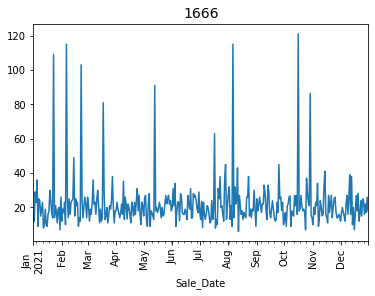

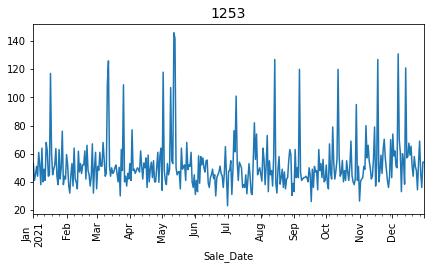

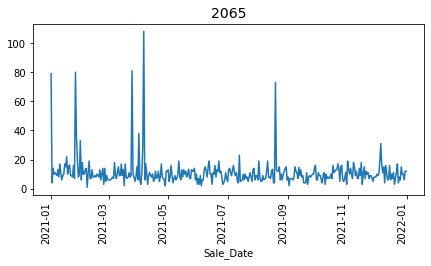

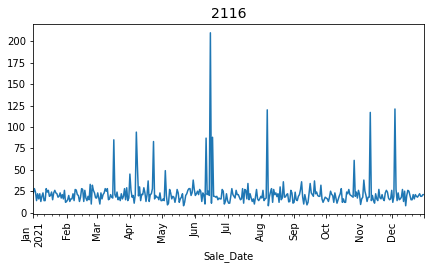

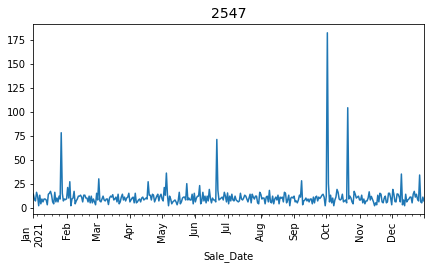

In [57]:
#Enter high risk stores and outliers here to get a visual on the sales. 

high_risk_list = ['1666','1253','2065','2116','2547']

for risk in high_risk_list:
    customer_df(df, risk)
    


## C: DOS for Specific Customers
#### Check for zero scan days for specific customers


In [58]:
# View the sales and deliveries by date and store
store_volume=pd.pivot_table(df, index=['Sale_Date','Store_ID'],values=['Sales'],aggfunc=np.sum)
store_volume = store_volume.reset_index()
print(store_volume)

       Sale_Date Store_ID  Sales
0     2021-01-01     1253   53.0
1     2021-01-01     1666   16.0
2     2021-01-01     2065   79.0
3     2021-01-01     2116   23.0
4     2021-01-01     2547   14.0
...          ...      ...    ...
10940 2021-12-31      822   10.0
10941 2021-12-31     8303    8.0
10942 2021-12-31     8566    6.0
10943 2021-12-31     9200    8.0
10944 2021-12-31     9223   12.0

[10945 rows x 3 columns]


In [59]:
# Examine stores with low DOS, and count zero sales days
def line_graph(df, customer_number):
    #Start_Date, #End_Date
    
    idx = pd.date_range(start = Start_Date ,end =  End_Date)
    
    df = df[df['Store_ID'] == customer_number]
    
    df = df[df['Type']== 'Sale']
    
    df=pd.pivot_table(df, index=['Sale_Date'],values=['Sales'],aggfunc=np.sum)
        
    df.index = pd.DatetimeIndex(df.index)
    
    df = df.reindex(idx, fill_value=0)
    
    df.plot()
    plt.title(customer_number, fontsize = 14) 
    plt.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = (7,3.5)
    plt.show()
    
    zero_df = df[df['Sales']== 0]
    
    print("# of ZERO SALES DAYS between ", Start_Date, "&", End_Date, ": ",len(zero_df))
    
    print(zero_df)
    
    
    

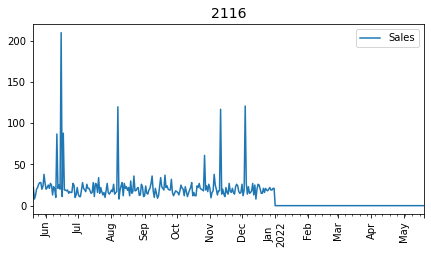

# of ZERO SALES DAYS between  2021-05-20 & 2022-05-20 :  140
            Sales
2022-01-01    0.0
2022-01-02    0.0
2022-01-03    0.0
2022-01-04    0.0
2022-01-05    0.0
...           ...
2022-05-16    0.0
2022-05-17    0.0
2022-05-18    0.0
2022-05-19    0.0
2022-05-20    0.0

[140 rows x 1 columns]


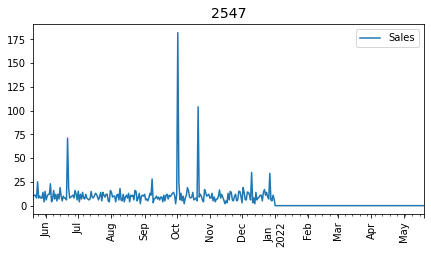

# of ZERO SALES DAYS between  2021-05-20 & 2022-05-20 :  140
            Sales
2022-01-01    0.0
2022-01-02    0.0
2022-01-03    0.0
2022-01-04    0.0
2022-01-05    0.0
...           ...
2022-05-16    0.0
2022-05-17    0.0
2022-05-18    0.0
2022-05-19    0.0
2022-05-20    0.0

[140 rows x 1 columns]


In [60]:
low_DOS_list = ['2116','2547']

for DOS in low_DOS_list:
    
    line_graph(df,  DOS)


# Section 6: Deliveries Vs Scans

## A: Deliveries Vs Sales
#### Bar graph to show stores with a low ratio of scans to deliveries.

In [61]:
shrink_report = pd.read_csv(shrink_report)

In [62]:
shrink_report = pd.DataFrame(shrink_report)
shrink_report.tail()

,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %
25,26,7548,30119,8069,65768.94,8069,48%
26,27,8303,16073,3981,33195.44,3981,50%
27,28,8566,14108,3947,31618.03,3947,52%
28,29,9200,15398,4426,34124.90,4426,54%
29,30,9223,30502,7993,64755.21,7993,56%


In [63]:
#Calculate the ratio of sales to deliveries
shrink_report['Ratio'] = (shrink_report['Sales']/ shrink_report['Delivery']) * 100 
shrink_report.tail()


,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %,Ratio
25,26,7548,30119,8069,65768.94,8069,48%,26.790398
26,27,8303,16073,3981,33195.44,3981,50%,24.768245
27,28,8566,14108,3947,31618.03,3947,52%,27.977034
28,29,9200,15398,4426,34124.90,4426,54%,28.743993
29,30,9223,30502,7993,64755.21,7993,56%,26.204839


In [64]:
#Take twenty five stores with the lowest sale to delivery ratio.
low_ratio = shrink_report.sort_values('Ratio').head(25)
print(len(low_ratio))
low_ratio_graph = low_ratio[['Store', 'Delivery','Sales']].copy()

25


In [65]:
##If certain locations are needing to be filtered out, that can be done here. Graph is recommended capped at 20 stores.
low_ratio_graph['Store'] = low_ratio_graph['Store'].astype("string")
store_list = ['4921','3686','1253','6865','8303']
low_ratio_graph = low_ratio_graph[~low_ratio_graph['Store'].isin(store_list)]

In [66]:
print(len(low_ratio_graph))
#print(low_ratio_graph)
low_ratio_graph.info()

20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 20 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Store     20 non-null     string
 1   Delivery  20 non-null     int64 
 2   Sales     20 non-null     int64 
dtypes: int64(2), string(1)
memory usage: 640.0 bytes


<AxesSubplot:xlabel='Store'>

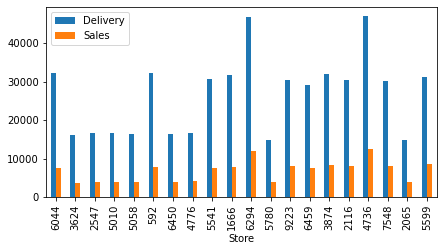

In [67]:
low_ratio_graph.set_index('Store').plot.bar()

# Section 7: Calculate & Analyze Shrink

## A: By Delivery Management

In [68]:
full_file.head()

,Store_ID,Delivery,Inventory,Sales,Sales_Amount,Shrink,Account_Number,Type,PBS,Group,DM,BU,State,Division
0,1253,76861,37665,18922.28,162224.19,-64197.0563,5.0,Retail,Yes,11.0,DM_1,433.0,PA,East
1,1666,31625,16088,7974.63,65985.15,-26757.1809,1.0,Retail,Yes,11.0,DM_1,412.0,NJ,North
2,2065,14783,7907,4007.50,32484.37,-15815.2563,26.0,Retail,No,11.0,DM_4,433.0,PA,North
3,2065,14783,7907,4007.50,32484.37,-15815.2563,28.0,Warehouse,No,11.0,DM_1,457.0,VA,South
4,2116,30509,15671,8092.92,61614.45,-25134.2250,21.0,Retail,No,11.0,DM_1,457.0,VA,East


In [69]:
DM =pd.pivot_table(full_file, index=['DM'],values=['Shrink'],aggfunc=np.sum)
print(DM)

           Shrink
DM               
DM_1 -410144.1967
DM_2 -217368.8314
DM_3  -58551.7185
DM_4  -73852.4545


## B:  State

In [70]:
State =pd.pivot_table(full_file, index=['State'],values=['Shrink'],aggfunc=np.sum)
print(State)

            Shrink
State             
CA     -97242.6803
NJ     -84471.8018
NY    -139748.8834
OH    -109869.9745
PA    -136373.4595
TX     -96984.6946
VA     -95225.7070


## C: By warehouse, Division

In [71]:
BU=pd.pivot_table(full_file, index=['BU'],values=['Shrink'],aggfunc=np.sum)
print(BU)

            Shrink
BU                
412.0 -181714.4821
422.0 -236733.5780
433.0 -136373.4595
457.0 -205095.6815


In [72]:
Division=pd.pivot_table(full_file, index=['Division'],values=['Shrink'],aggfunc=np.sum)
print(Division)

               Shrink
Division             
East     -215955.0586
North    -203384.4029
South    -221955.4073
West     -118622.3323


## D. Best Stores

In [73]:
# These stores are performing the best. 
# First in shrink Dollars

best = shrink_report.sort_values(by='Shrink Dollars', ascending=True)
best.head(10)

,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %,Ratio
0,1,592,32271,7822,65745.46,0,0%,24.238480
1,2,822,14463,3988,34053.33,0,0%,27.573809
2,3,1253,76861,18922,162224.19,0,0%,24.618467
3,4,1666,31625,7975,65985.15,0,0%,25.217391
4,5,2065,14783,4008,32484.37,0,0%,27.112223
5,6,2116,30509,8093,61614.45,0,0%,26.526599
24,25,6865,17402,3712,31828.48,3712,46%,21.330882
8,9,3624,16100,3830,32470.94,3830,14%,23.788820
19,20,5780,14922,3902,32727.94,3902,36%,26.149310
16,17,5058,16309,3925,31949.58,3925,30%,24.066466


In [74]:
#By percentage
percentage = shrink_report.sort_values(by='Shrink %', ascending=True)
percentage.tail(10)

,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %,Ratio
20,21,6044,32280,7586,65677.75,7586,38%,23.500620
21,22,6294,46627,11868,98304.06,11868,40%,25.453064
22,23,6450,16488,4026,32469.71,4026,42%,24.417758
23,24,6459,29190,7682,65061.79,7682,44%,26.317232
24,25,6865,17402,3712,31828.48,3712,46%,21.330882
25,26,7548,30119,8069,65768.94,8069,48%,26.790398
26,27,8303,16073,3981,33195.44,3981,50%,24.768245
27,28,8566,14108,3947,31618.03,3947,52%,27.977034
28,29,9200,15398,4426,34124.90,4426,54%,28.743993
29,30,9223,30502,7993,64755.21,7993,56%,26.204839


## E. Worst Stores

In [75]:
# By shrink Dollars
# These should be reviewed in the high risk graphs 
best.tail(10)

,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %,Ratio
20,21,6044,32280,7586,65677.75,7586,38%,23.500620
17,18,5541,30646,7638,63695.54,7638,32%,24.923318
23,24,6459,29190,7682,65061.79,7682,44%,26.317232
7,8,3071,29068,7985,66979.57,7985,12%,27.470070
29,30,9223,30502,7993,64755.21,7993,56%,26.204839
25,26,7548,30119,8069,65768.94,8069,48%,26.790398
11,12,3874,31844,8408,63209.39,8408,20%,26.403718
18,19,5599,31169,8511,65516.98,8511,34%,27.305977
21,22,6294,46627,11868,98304.06,11868,40%,25.453064
12,13,4736,46947,12554,99475.75,12554,22%,26.740793


In [76]:
percentage.head()

,Account,Store,Delivery,Sales,Sales Dollar,Shrink Dollars,Shrink %,Ratio
0,1,592,32271,7822,65745.46,0,0%,24.238480
1,2,822,14463,3988,34053.33,0,0%,27.573809
2,3,1253,76861,18922,162224.19,0,0%,24.618467
3,4,1666,31625,7975,65985.15,0,0%,25.217391
4,5,2065,14783,4008,32484.37,0,0%,27.112223


# Section 8: High Risk/ High Shrink

## A: Outliers
#### Any other outliers can be looked at in one of the graphs above by chaging the store lists. 

## B: Oddities & Interests

In [77]:
# Examine stores with low DOS, and count zero sales days
def lines(df, customer_number):
   
    idx = pd.date_range(start = Start_Date ,end =  End_Date)
    
    df = df[df['Store_ID'] == customer_number]
    
    df=pd.pivot_table(df, index=['Sale_Date'],values=['Sales', 'Delivery', 'Inventory'],aggfunc=np.sum)
        
    df.index = pd.DatetimeIndex(df.index)
    
    df = df.reindex(idx, fill_value=0)
    
    df.plot()
    plt.title(customer_number, fontsize = 14) 
    plt.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = (7,3.5)
    plt.show()
    
   
    

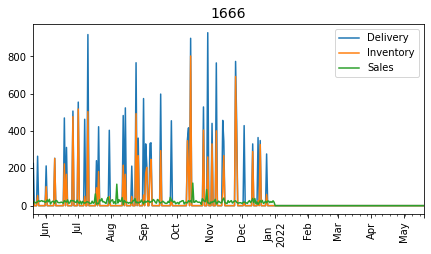

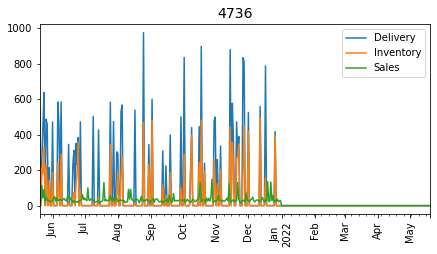

In [78]:
high_risk_list2 = ['1666','4736']
for risk in high_risk_list2:
    lines(df, risk)



## C: Highest by Percentages
#### Re-run above with highest shrink percentage stores if needed. 

# Section 9: Other

## A: Equipment Maintenance
#### Review open tickets for equipment maintenance
## B: Accounting/ Payment Issues
#### Talk to accounting for any issues and help to resolve payment
## C: Process
#### Find out the process: How do scans/ deliveries get in the system? What is the lag? Who is responsible? Are there any gaps? 
